In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from tkinter import * 
import scipy
import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [82]:
#데이터 정리

# .csv 불러오기
df = pd.read_csv('/content/drive/MyDrive/AITest/Projects/vgames2.csv')

#필요없는 컬럼 제거
df = df.drop('Unnamed: 0', axis=1)

def removeMK(val):
  if 'K' in val:
    return float(val.replace('K', ''))
  elif 'M' in val:
    return float(val.replace('M', ''))*1000
  else:
    return float(val)*1000

#매출 관련 컬럼들에서 K와 M 을 제거하고, M을 제거하면 1000배, 아무것도 없는경우 1000배. (기본값 K로 고정)
df['NA_Sales'] = df['NA_Sales'].apply(removeMK)
df['EU_Sales'] = df['EU_Sales'].apply(removeMK)
df['JP_Sales'] = df['JP_Sales'].apply(removeMK)
df['Other_Sales'] = df['Other_Sales'].apply(removeMK)

#데이터형의 경우 컬럼 변수 타입을 float 으로 변경.
df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')

#Global_Sales 추가
df['Global_Sales'] = df['Other_Sales'] +df['JP_Sales'] +df['EU_Sales'] +df['NA_Sales']

#분류형 컬럼의 경우 컬럼 변수 타입을 category형으로 변경.
df['Platform'] = df['Platform'].astype('category')
df['Genre'] = df['Genre'].astype('category')
df['Publisher'] = df['Publisher'].astype('category')

#년도 이상치 관리
def changeYear(val):
  if val <= 23:
    val += 2000
    return val
  elif (100 > val) & (val > 23):
    val += 1900
    return val
  else:
    return val
    
df['Year'] = df['Year'].apply(changeYear)
#Imagine: Makeup Artist의 제작년도를 2020년에서 2008년으로 변경.
df.loc[df['Name'] == 'Imagine: Makeup Artist', 'Year'] = 2008

#중복 row를 제거, null value 제거,
df = df.drop_duplicates()
df.dropna(inplace=True)

#년도 int형으로 변경.
df['Year'] = df['Year'].astype(int)

df.sort_values('Year', ascending=False, inplace=True)

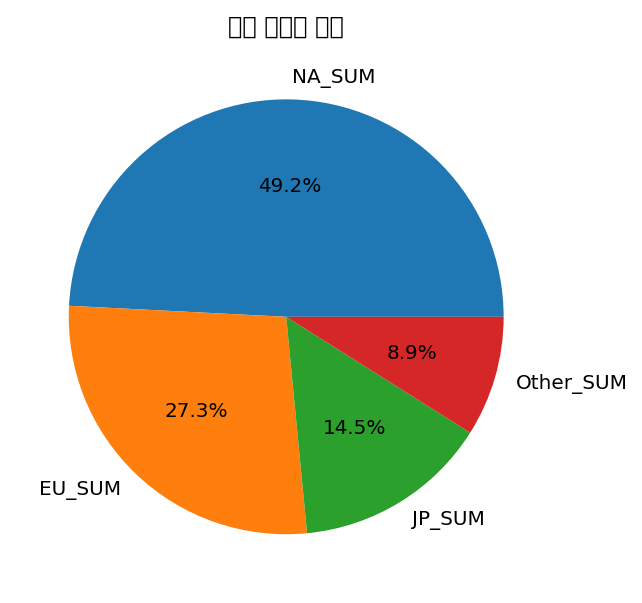

In [83]:
#지역별 판매 비율
df_locPer = pd.DataFrame(columns=['NA_SUM','EU_SUM','JP_SUM','Other_SUM'])
df_locPer.loc[0, 'NA_SUM'] = df['NA_Sales'].sum()
df_locPer.loc[0, 'EU_SUM'] = df['EU_Sales'].sum()
df_locPer.loc[0, 'JP_SUM'] = df['JP_Sales'].sum()
df_locPer.loc[0, 'Other_SUM'] = df['Other_Sales'].sum()

plt.figure(figsize=(5,5))
plt.title('지역 판매량 비율')
plt.pie(df_locPer, labels=df_locPer.columns, autopct='%.1f%%')
plt.show()

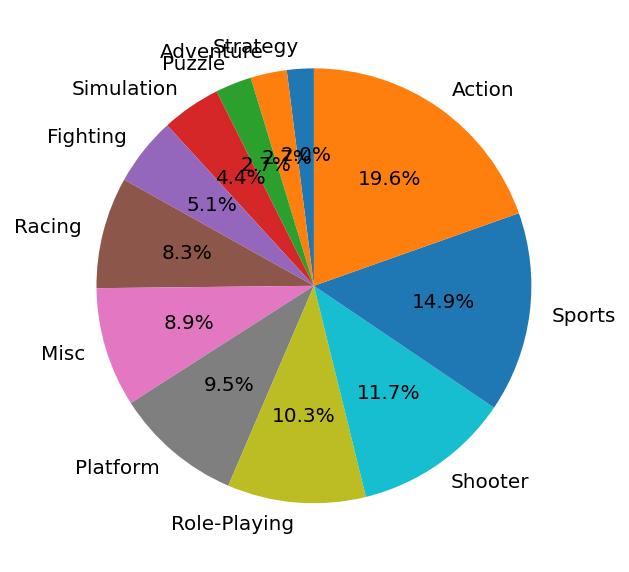

In [84]:
#장르별 판매 비율
temp_genrePer = df.groupby(['Genre']).sum()
temp_genrePer = temp_genrePer.reset_index()
temp_genrePer['Genre_Per'] = round( temp_genrePer['Global_Sales']  / temp_genrePer['Global_Sales'].sum() ,3)
temp_genrePer.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'],axis=1, inplace=True)
temp_genrePer.sort_values('Genre_Per', inplace=True)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(temp_genrePer['Genre_Per'], labels=temp_genrePer['Genre'], autopct='%1.1f%%', startangle=90)

plt.show()

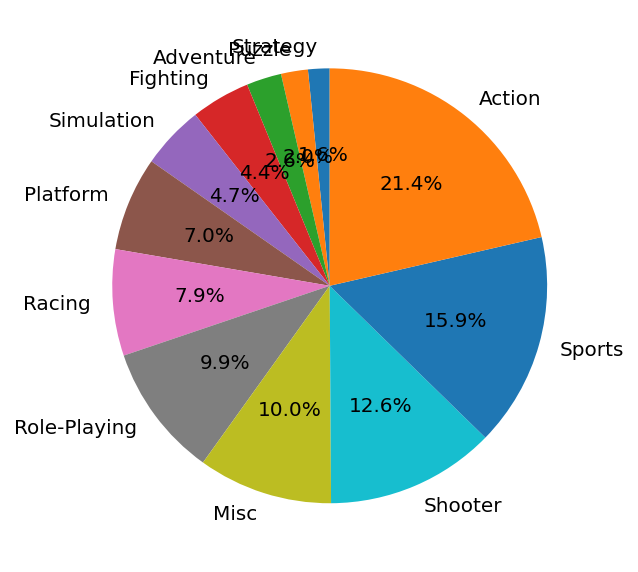

In [85]:
#2000년 이후 장르별 판매 비율
temp_genrePer = df.query('Year >= 2000').groupby(['Genre']).sum()
temp_genrePer = temp_genrePer.reset_index()
temp_genrePer['Genre_Per'] = round( temp_genrePer['Global_Sales']  / temp_genrePer['Global_Sales'].sum() ,3)
temp_genrePer.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'],axis=1, inplace=True)
temp_genrePer.sort_values('Genre_Per', inplace=True)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(temp_genrePer['Genre_Per'], labels=temp_genrePer['Genre'], autopct='%1.1f%%', startangle=90)

plt.show()

In [86]:
temp_genrePer

,Genre,Global_Sales,Genre_Per
11,Strategy,115470.0,0.016
5,Puzzle,139040.0,0.020
1,Adventure,184440.0,0.026
2,Fighting,312790.0,0.044
9,Simulation,336730.0,0.047
4,Platform,496860.0,0.070
6,Racing,561640.0,0.079
7,Role-Playing,703490.0,0.099
3,Misc,707830.0,0.100
8,Shooter,896090.0,0.126


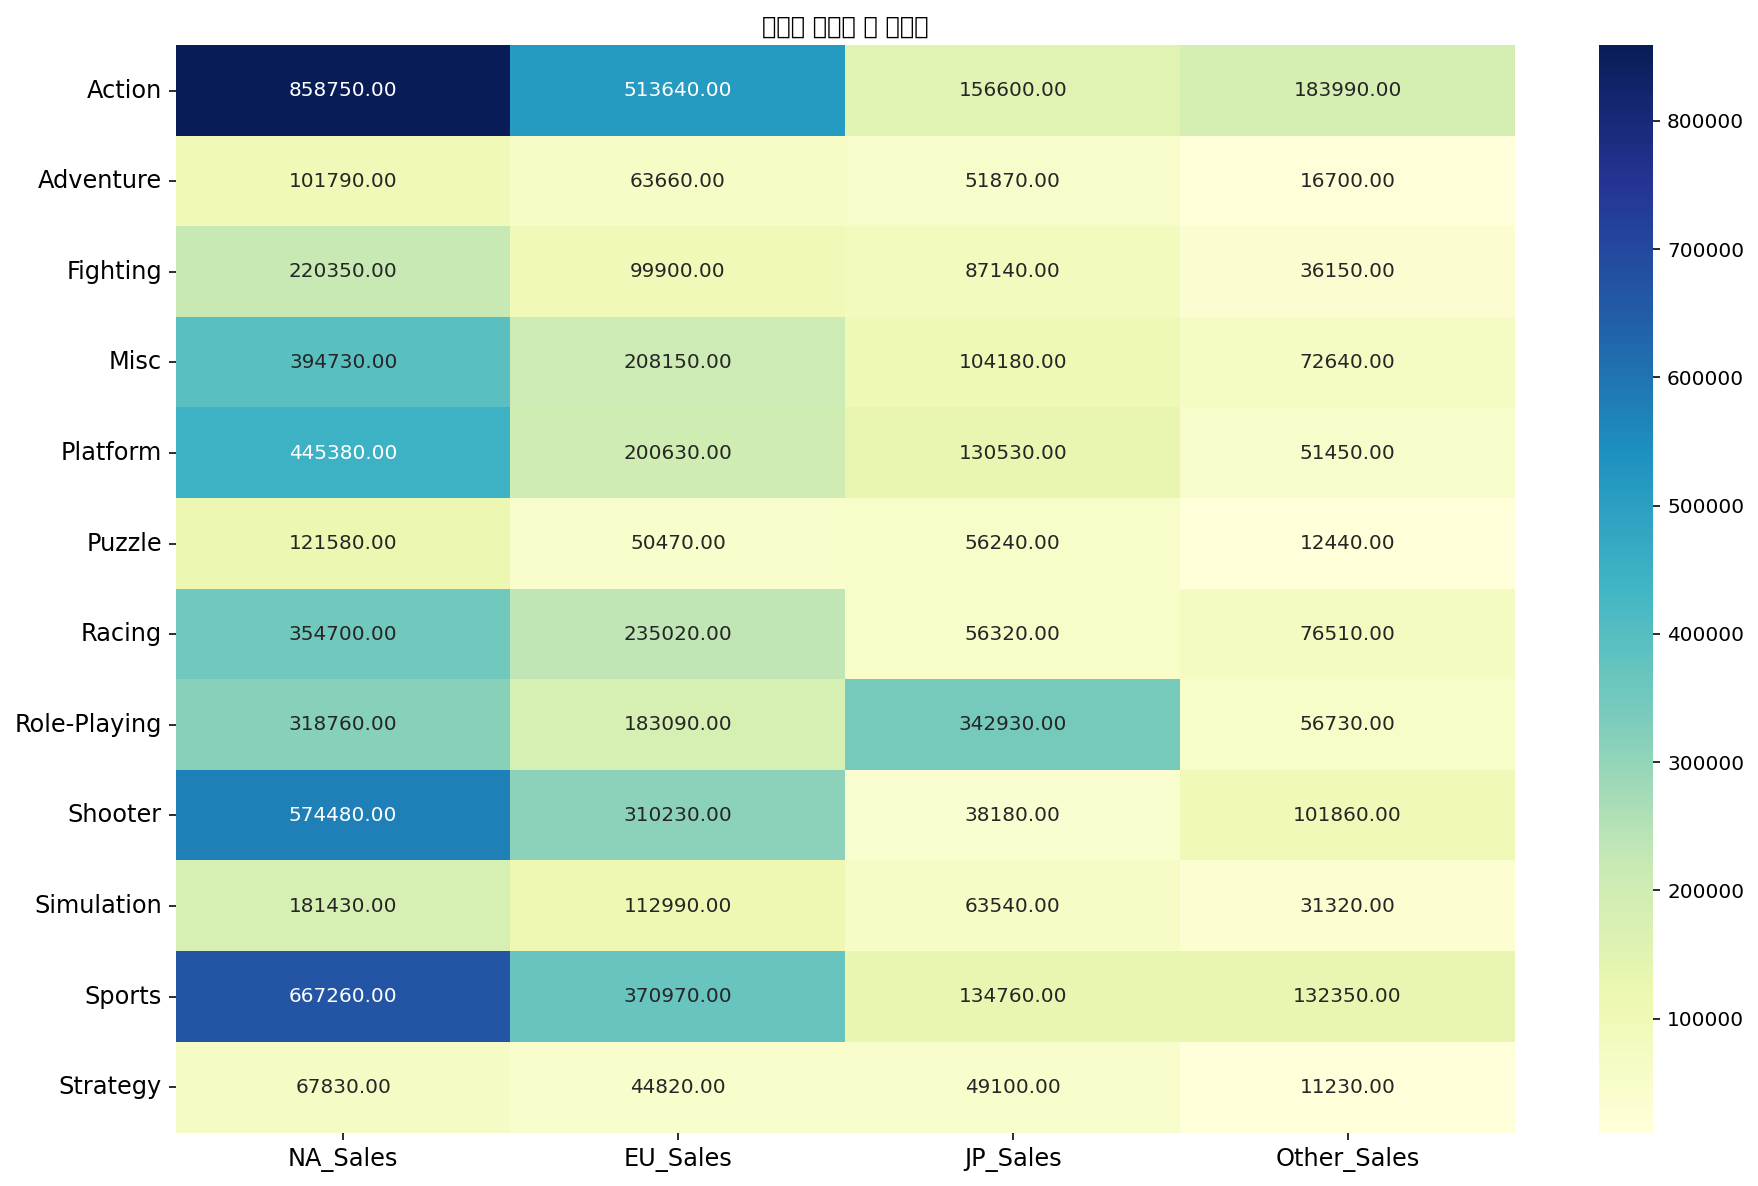

In [87]:
#지역별 장르별 총 판매량
temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
temp_grouped = temp_genre.groupby(['Genre']).sum()
plt.figure(figsize=(15, 10))
a = sns.heatmap(temp_grouped, annot=True, fmt = '.2f', cmap="YlGnBu")
plt.title('지역별 장르별 총 판매량')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
a.set_ylabel('', fontsize=10)
plt.show()

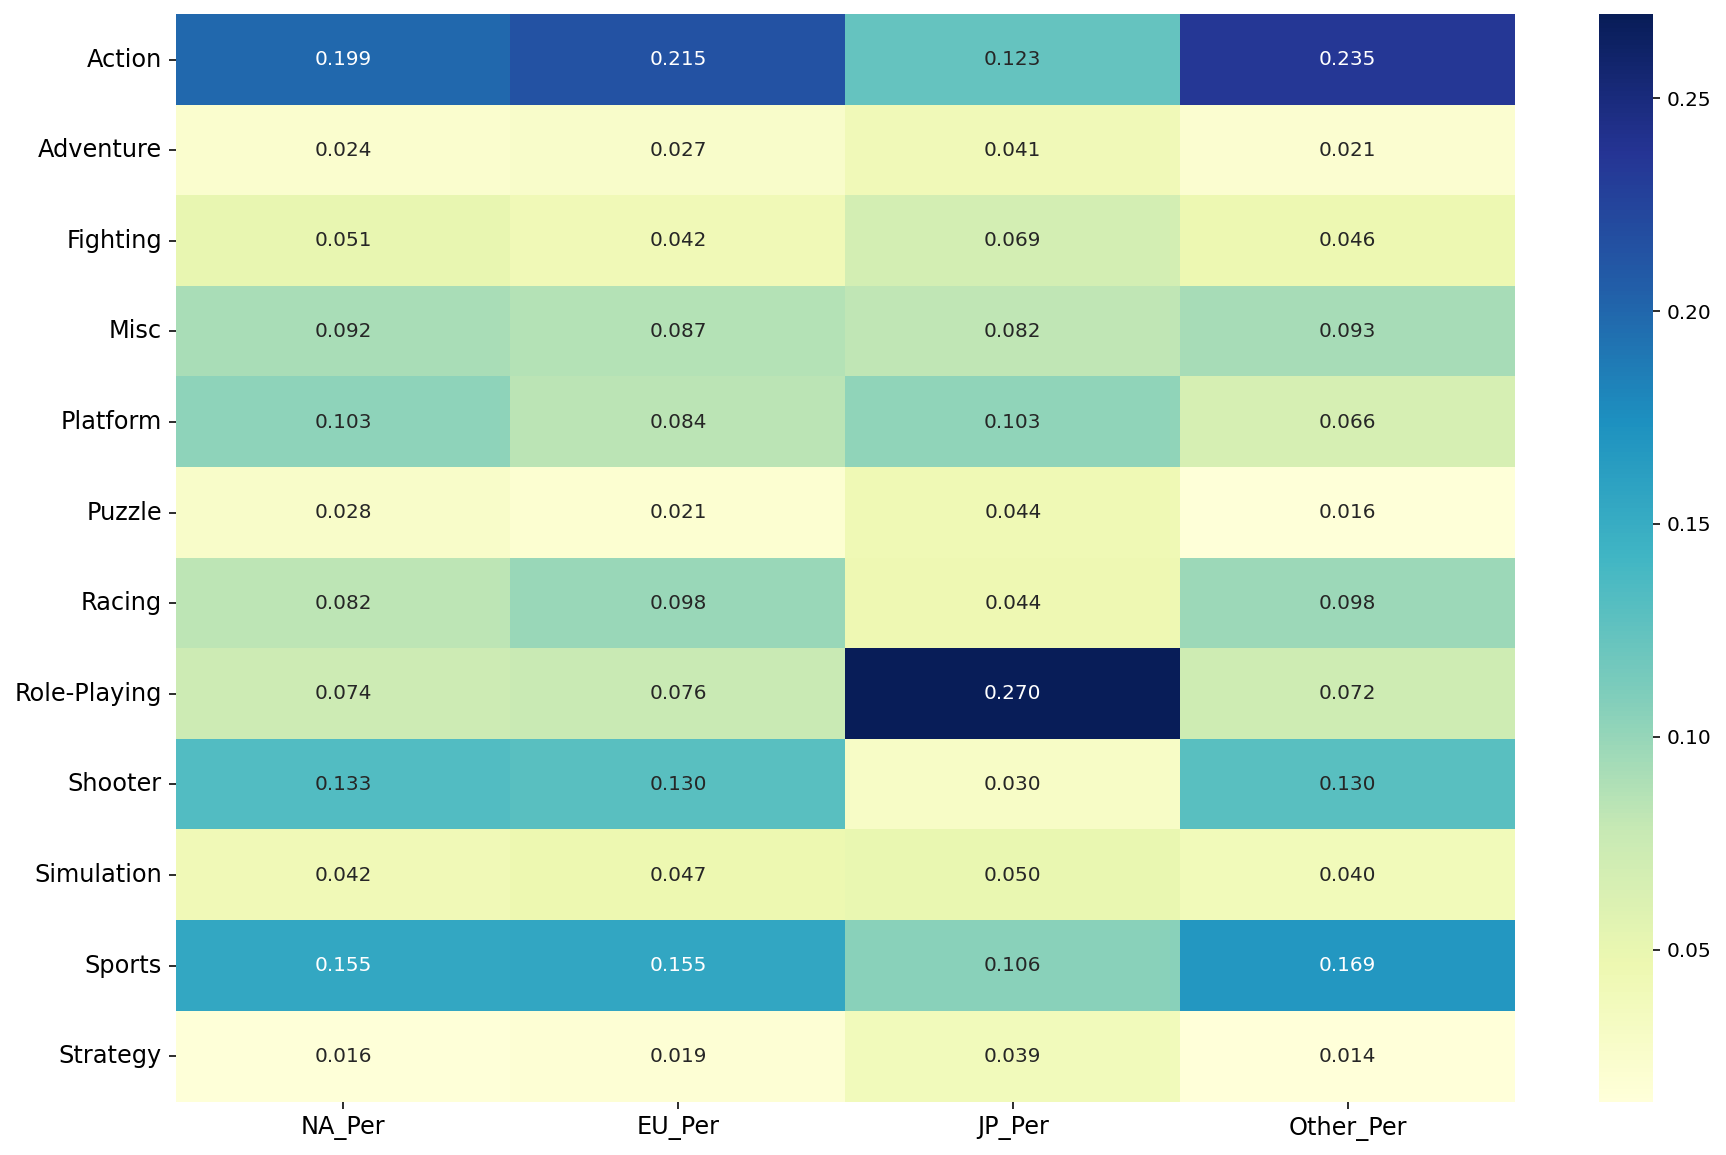

In [88]:
#지역별 장르점유율
temp_genre2 = temp_grouped.copy()
temp_genre2['NA_Per'] =  round(temp_grouped['NA_Sales']/temp_grouped['NA_Sales'].sum(),4)
temp_genre2['EU_Per'] =  round(temp_grouped['EU_Sales']/temp_grouped['EU_Sales'].sum(),4)
temp_genre2['JP_Per'] =  round(temp_grouped['JP_Sales']/temp_grouped['JP_Sales'].sum(),4)
temp_genre2['Other_Per'] =  round(temp_grouped['Other_Sales']/temp_grouped['Other_Sales'].sum(),4)
temp_genre2.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
plt.figure(figsize=(15, 10))
a = sns.heatmap(temp_genre2, annot=True, fmt = '.3f', cmap="YlGnBu")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
a.set_ylabel('', fontsize=10)
plt.show()

In [89]:
### 1)
# -- 지역에 따라서 선호하는 게임 장르가 다를까?
# 다르다
# -- 지역 구분
# 북미, 유럽, 일본, 기타
# -- 지역별로 선호하는 게임의 장르
# 판매량이나 설문조사항목이 없으므로, 매출액 기준으로 판단.
# 북미 : Action, Sports, Shooter, Platform, Misc
# 유럽 : Action, Sports, Shooter, Racing, Misc
# 일본 : Role-Playing, Action, Sports, Platform, Misc
# 기타 : Action, Sports, Shooter, Racing, Misc
# -- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함
# 일본이 다른지역과 선호하는 장르가 다름.

In [90]:
### 2)
# 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
# --> 년도별 장르 매출비율을 그래프로 표현한다.
#  트렌드는 어떤 것을 기준으로 파악했는지 설명함
# --> 점유율의 변화
#  연도별로 트렌드가 존재하는지 여부를 언급함
# --> 존재함.
#  왜 존재한다/존재하지 않는다고 생각했는지 설명함
# --> 

In [91]:
#장르 트렌드 
df_group = pd.DataFrame(df.groupby(['Year','Genre'])[('NA_Sales','EU_Sales','JP_Sales','Other_Sales')].sum().sort_values( by=['Year','Genre']))
df_group['Global_Sales'] = df_group['Other_Sales'] +df_group['JP_Sales'] +df_group['EU_Sales'] +df_group['NA_Sales']
df_group['PerGen'] = df_group.groupby('Year')['Global_Sales'].apply(lambda x: round(x * 100 / x.sum(),1))
df_group['Count'] = df.groupby(['Year','Genre'])['Name'].count()
df_group['SalesPerCount'] = round(df_group['Global_Sales']/df_group['Count'],2)
df_group['SalesPerCount'].fillna(0.0, inplace=True)
df_group = pd.DataFrame(df_group)
df_group

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Year Genre                                                                   
1980 Action           320.0      20.0       0.0          0.0         340.0   
     Adventure          0.0       0.0       0.0          0.0           0.0   
     Fighting         720.0      40.0       0.0         10.0         770.0   
     Misc            2530.0     150.0       0.0         20.0        2700.0   
     Platform           0.0       0.0       0.0          0.0           0.0   
...                     ...       ...       ...          ...           ...   
2017 Role-Playing       0.0       0.0      40.0          0.0          40.0   
     Shooter            0.0       0.0       0.0          0.0           0.0   
     Simulation         0.0       0.0       0.0          0.0           0.0   
     Sports             0.0       0.0       0.0          0.0           0.0   
     Strategy           0.0       0.0       0.0          0.0           0.0   

                   PerGen  Count  SalesPerCount  
Year Genre                                       
1980 Action           3.1      1          340.0  
     Adventure        0.0      0            0.0  
     Fighting         7.1      1          770.0  
     Misc            24.8      4          675.0  
     Platform         0.0      0            0.0  
...                   ...    ...            ...  
2017 Role-Playing    80.0      2           20.0  
     Shooter          0.0      0            0.0  
     Simulation       0.0      0            0.0  
     Sports           0.0      0            0.0  
     Strategy         0.0      0            0.0  

[456 rows x 8 columns]

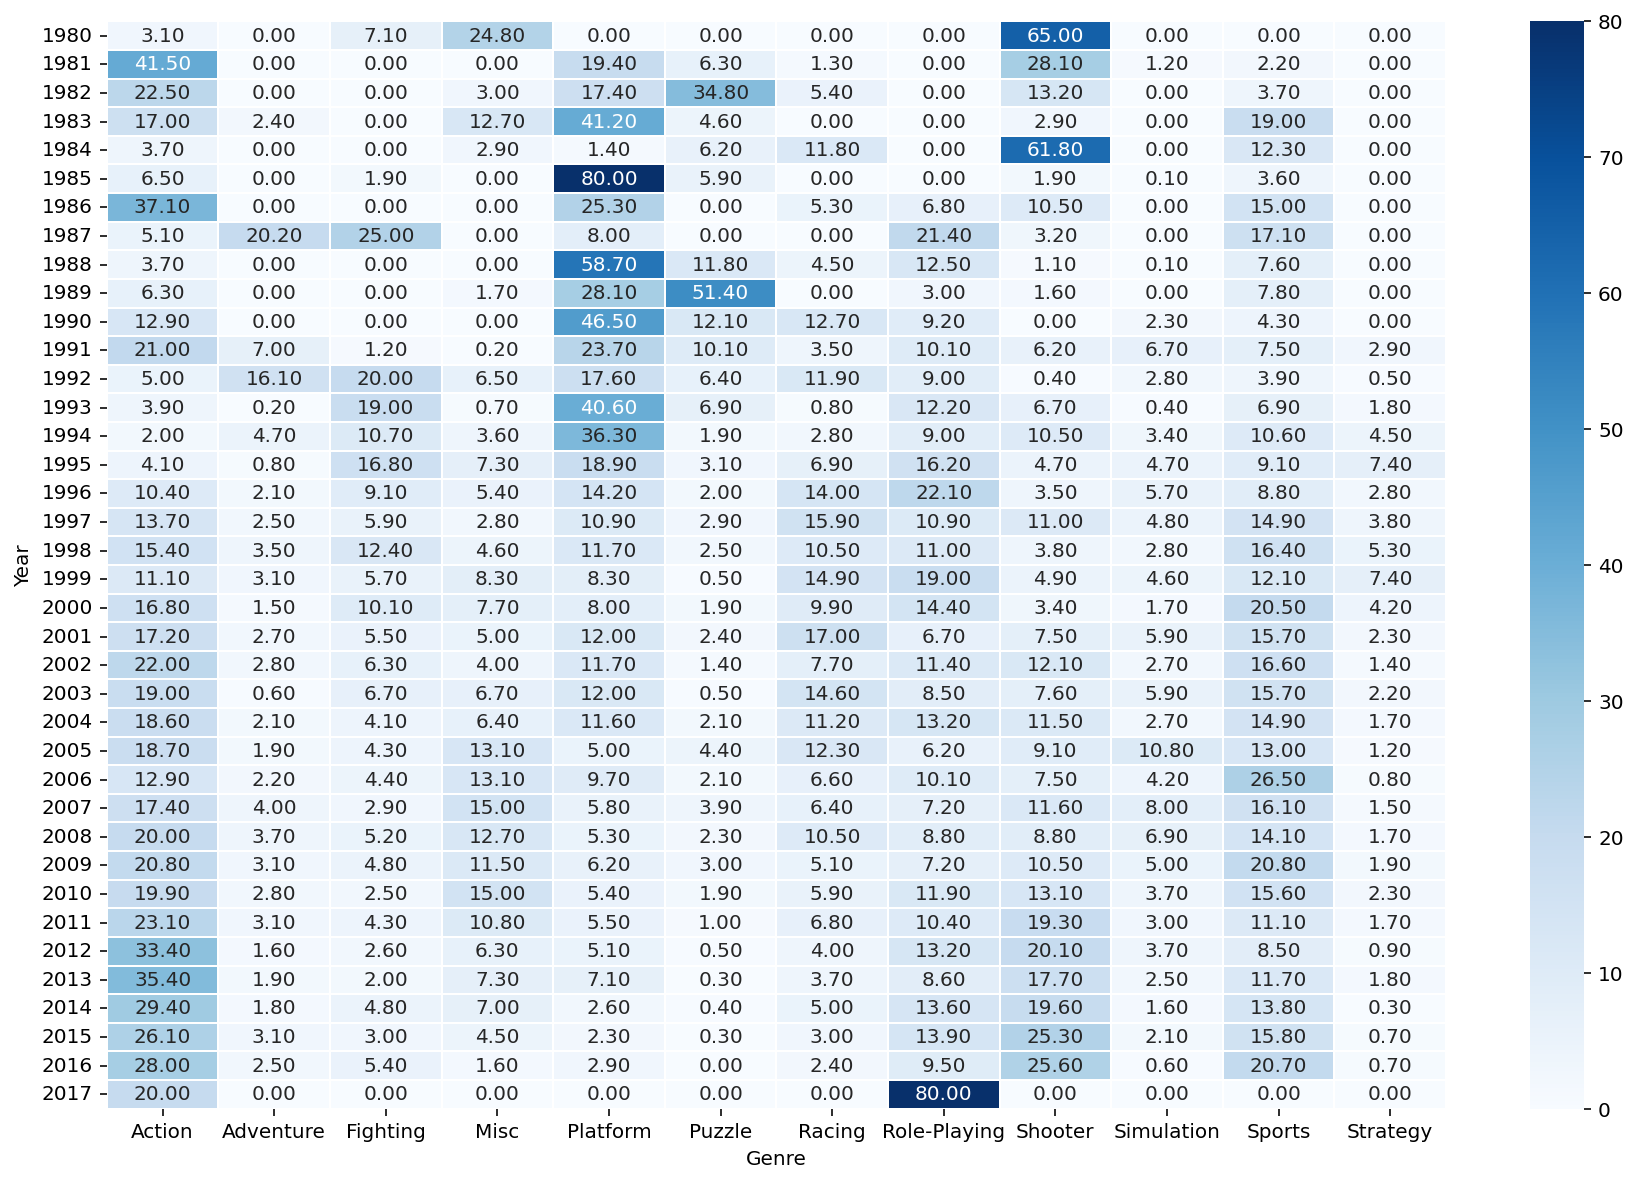

In [92]:
#년도별 장르 점유율
df_heatmap_group = df_group.copy()
genreList = pd.DataFrame(df_heatmap_group.index.get_level_values(1)).drop_duplicates()
yearList = pd.DataFrame(df_heatmap_group.index.get_level_values(0)).drop_duplicates()

df_heatmap_group.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], axis=1, inplace=True)

plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap_group.pivot_table(index='Year', columns='Genre', values='PerGen'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

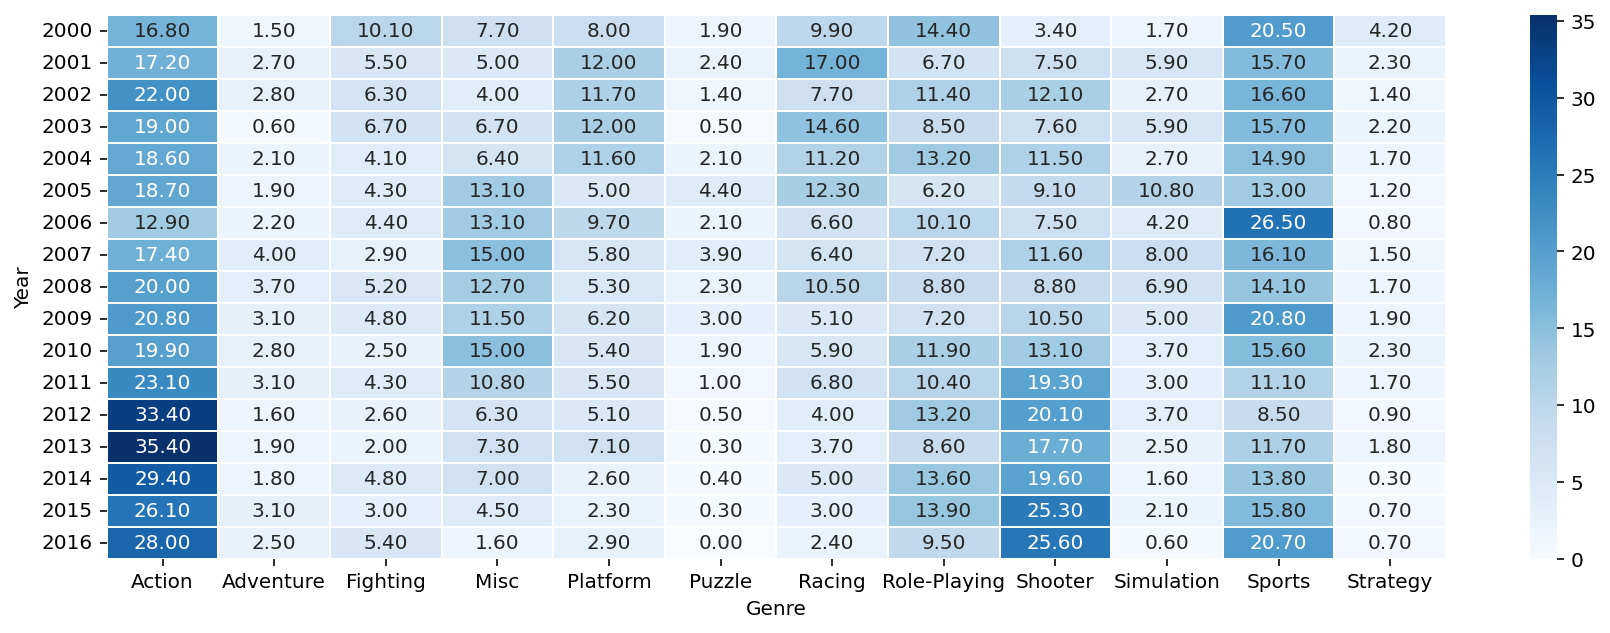

In [93]:
#2000년 이후 년도별 장르 점유율
df_heatmap_group = df_group.query('Year < 2017 and Year >= 2000')
genreList = pd.DataFrame(df_heatmap_group.index.get_level_values(1)).drop_duplicates()
yearList = pd.DataFrame(df_heatmap_group.index.get_level_values(0)).drop_duplicates()

df_heatmap_group.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], axis=1, inplace=True)

plt.figure(figsize=(15, 5))
sns.heatmap(df_heatmap_group.pivot_table(index='Year', columns='Genre', values='PerGen'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [94]:
# 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
#  인기가 많다는 것을 어떻게 정의했는지 설명함
#  해당 게임이 왜 인기가 많다고 생각했는지 설명함
#  시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)
#  해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

In [95]:
#인기 게임
df['Global_Sales']

10107      30.0
5310       10.0
15233      10.0
3738       30.0
1070       70.0
          ...  
14264     770.0
7317      230.0
10121    1050.0
5938     1150.0
15012    2760.0
Name: Global_Sales, Length: 16241, dtype: float64

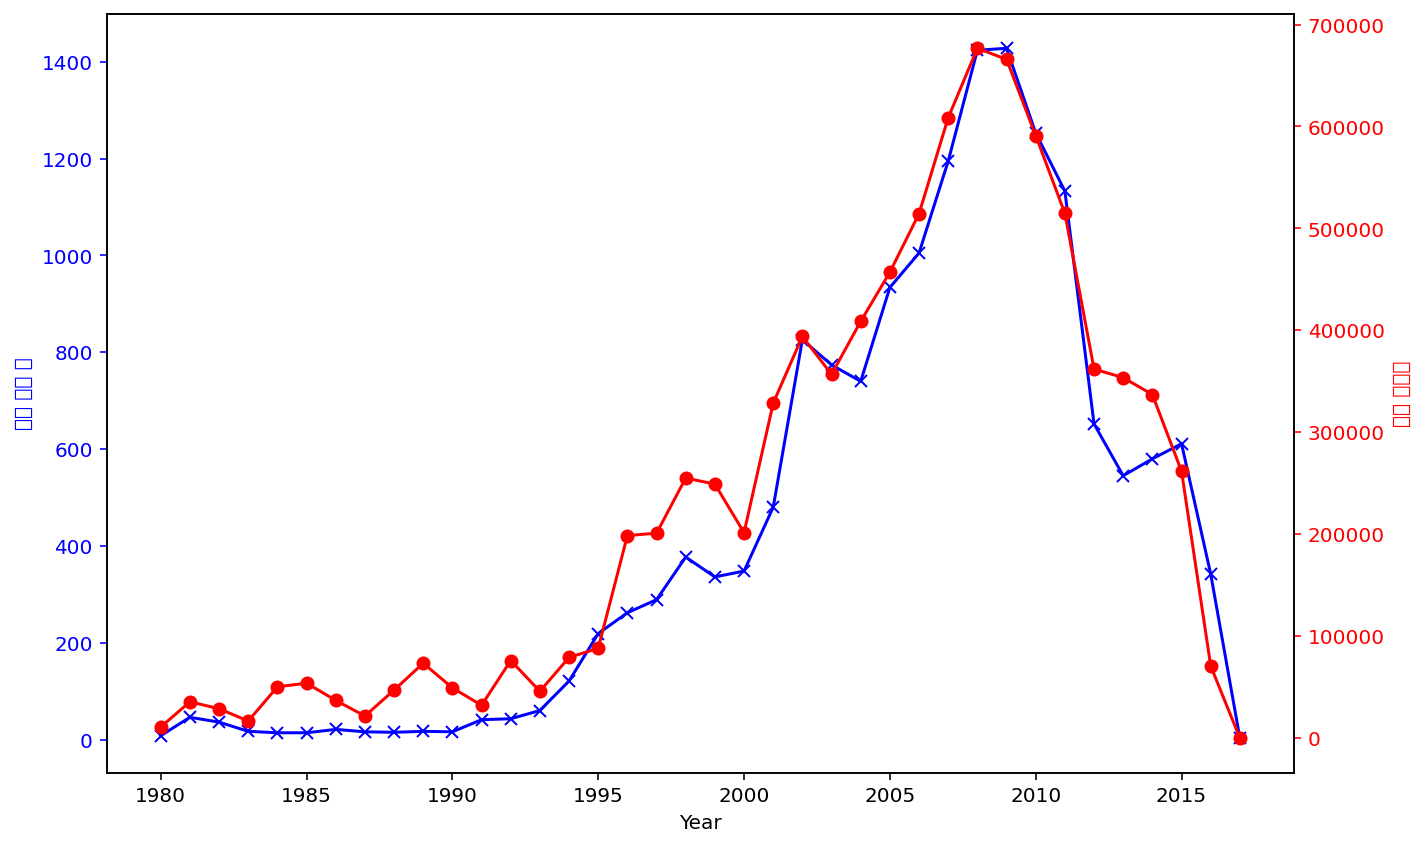

In [96]:
#년도별 발매 게임수 와 세계 판매량

df_dum = pd.DataFrame()
df_dum['Count'] = df.groupby('Year')['Name'].count()
df_dum['Global_Sales_sum'] = df.groupby('Year')['Global_Sales'].sum()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_dum['Count'], color='b', marker='x')
ax1.set_xlabel('Year')
ax1.set_ylabel('발매 게임 수', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(df_dum['Global_Sales_sum'], color='r', marker='o')
ax2.set_ylabel('세계 판매량', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
plt.show()

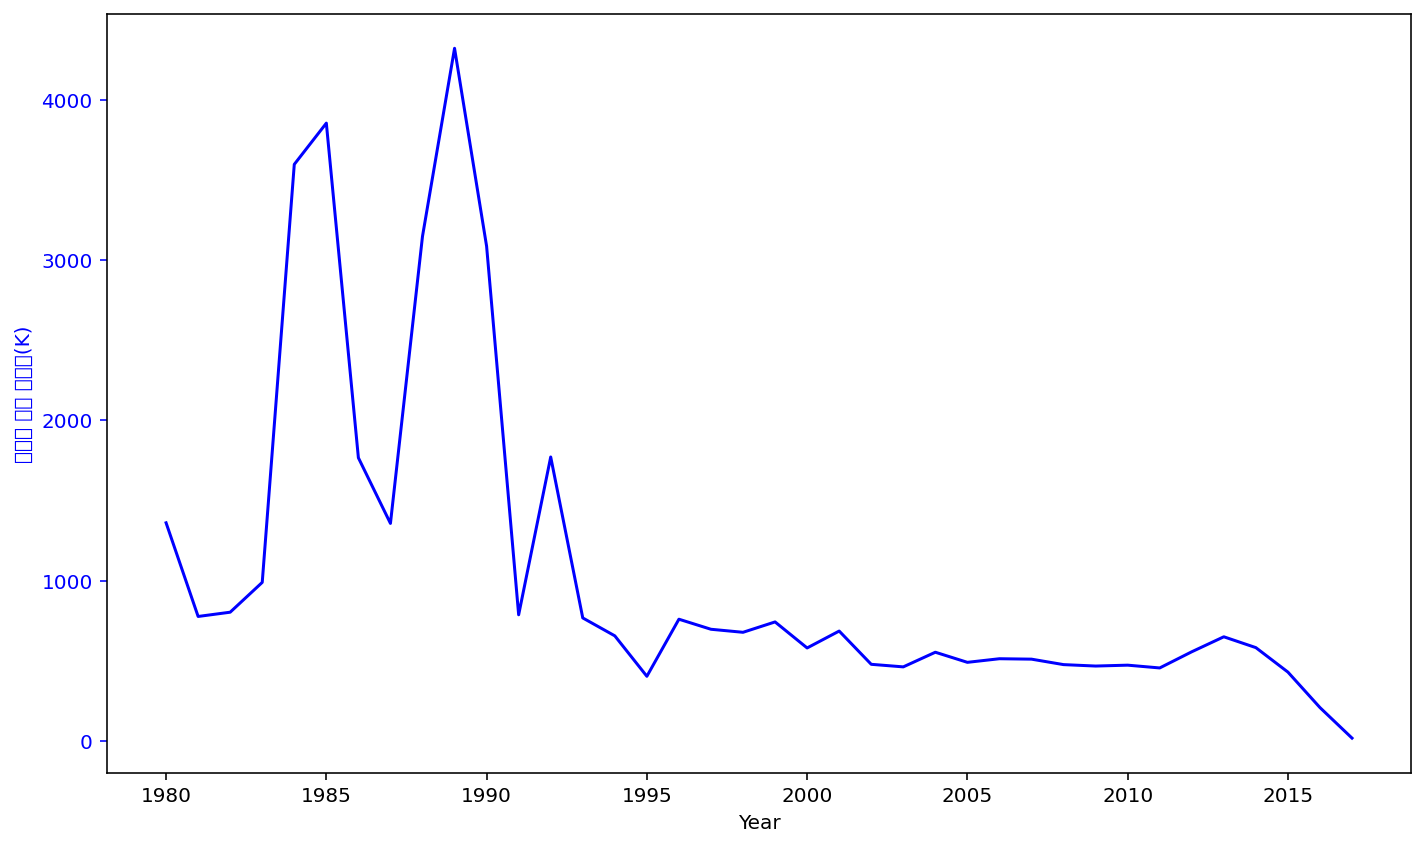

In [97]:
#년도별 평균 판매량

df_dum['Global_Sales_mean'] = df.groupby('Year')['Global_Sales'].mean()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_dum['Global_Sales_mean'], color='b', marker='')
ax1.set_xlabel('Year')
ax1.set_ylabel('연도별 평균 판매량(K)', color='b')
ax1.tick_params('y', colors='b')
fig.tight_layout()
plt.show()

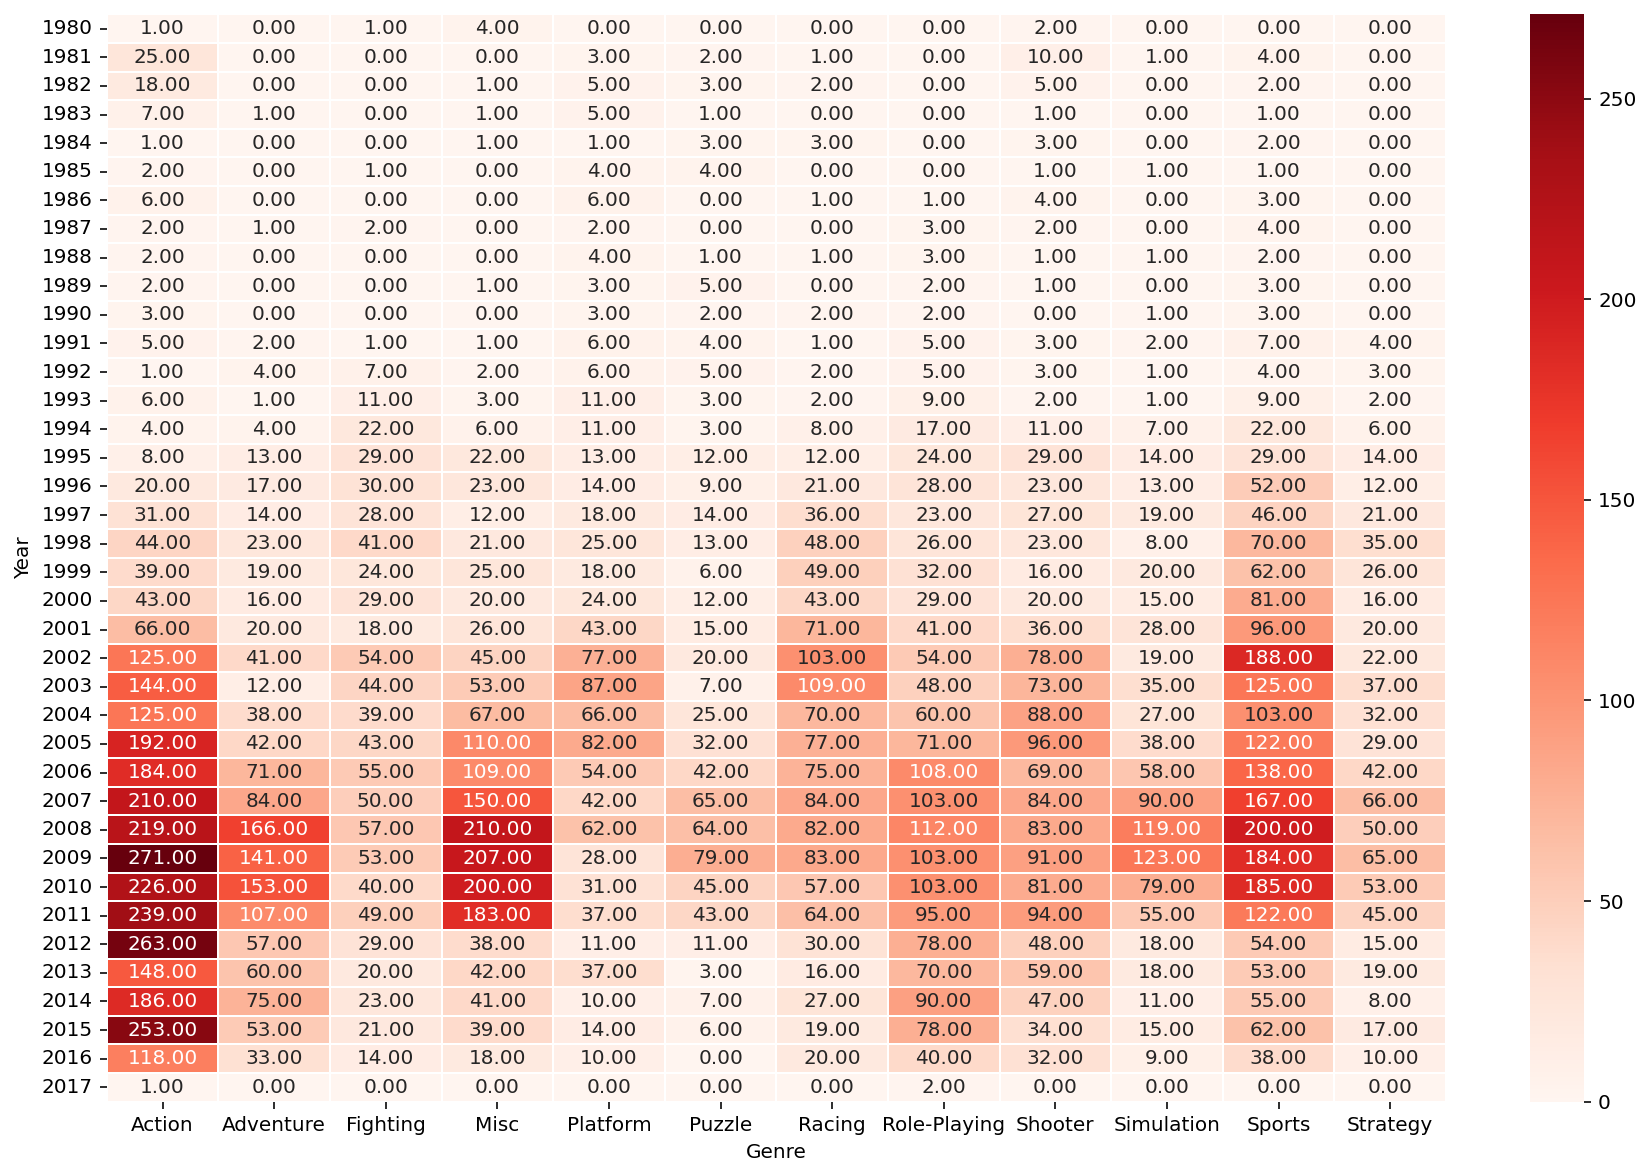

In [98]:
#장르별 년도별 발매 게임 수
df_heatmap_group = df_group
genreList = pd.DataFrame(df_heatmap_group.index.get_level_values(1)).drop_duplicates()
yearList = pd.DataFrame(df_heatmap_group.index.get_level_values(0)).drop_duplicates()

plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap_group.pivot_table(index='Year', columns='Genre', values='Count'), annot=True, fmt='.2f', linewidths=.5, cmap='Reds')

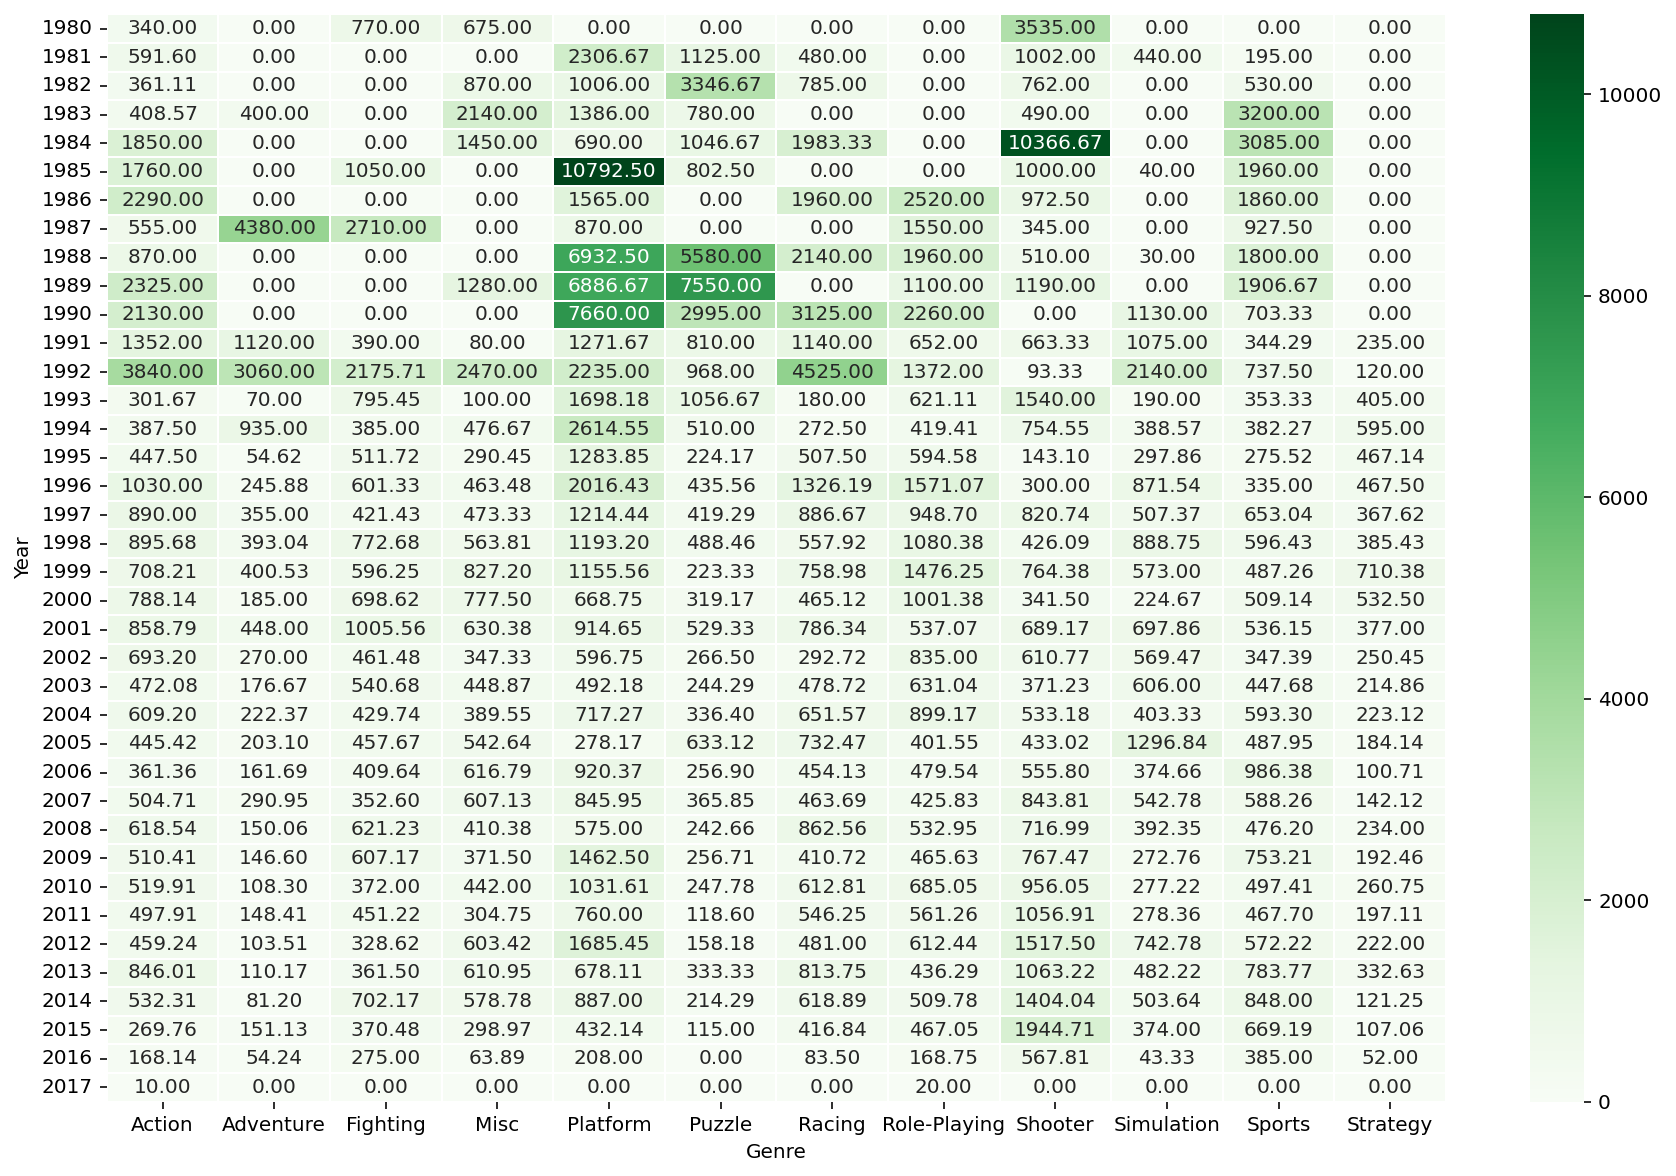

In [99]:
#장르별 년도별 평균 판매량
df_heatmap_group = df_group.copy()
genreList = pd.DataFrame(df_heatmap_group.index.get_level_values(1)).drop_duplicates()
yearList = pd.DataFrame(df_heatmap_group.index.get_level_values(0)).drop_duplicates()

plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap_group.pivot_table(index='Year', columns='Genre', values='SalesPerCount'), annot=True, fmt='.2f', linewidths=.5, cmap='Greens')

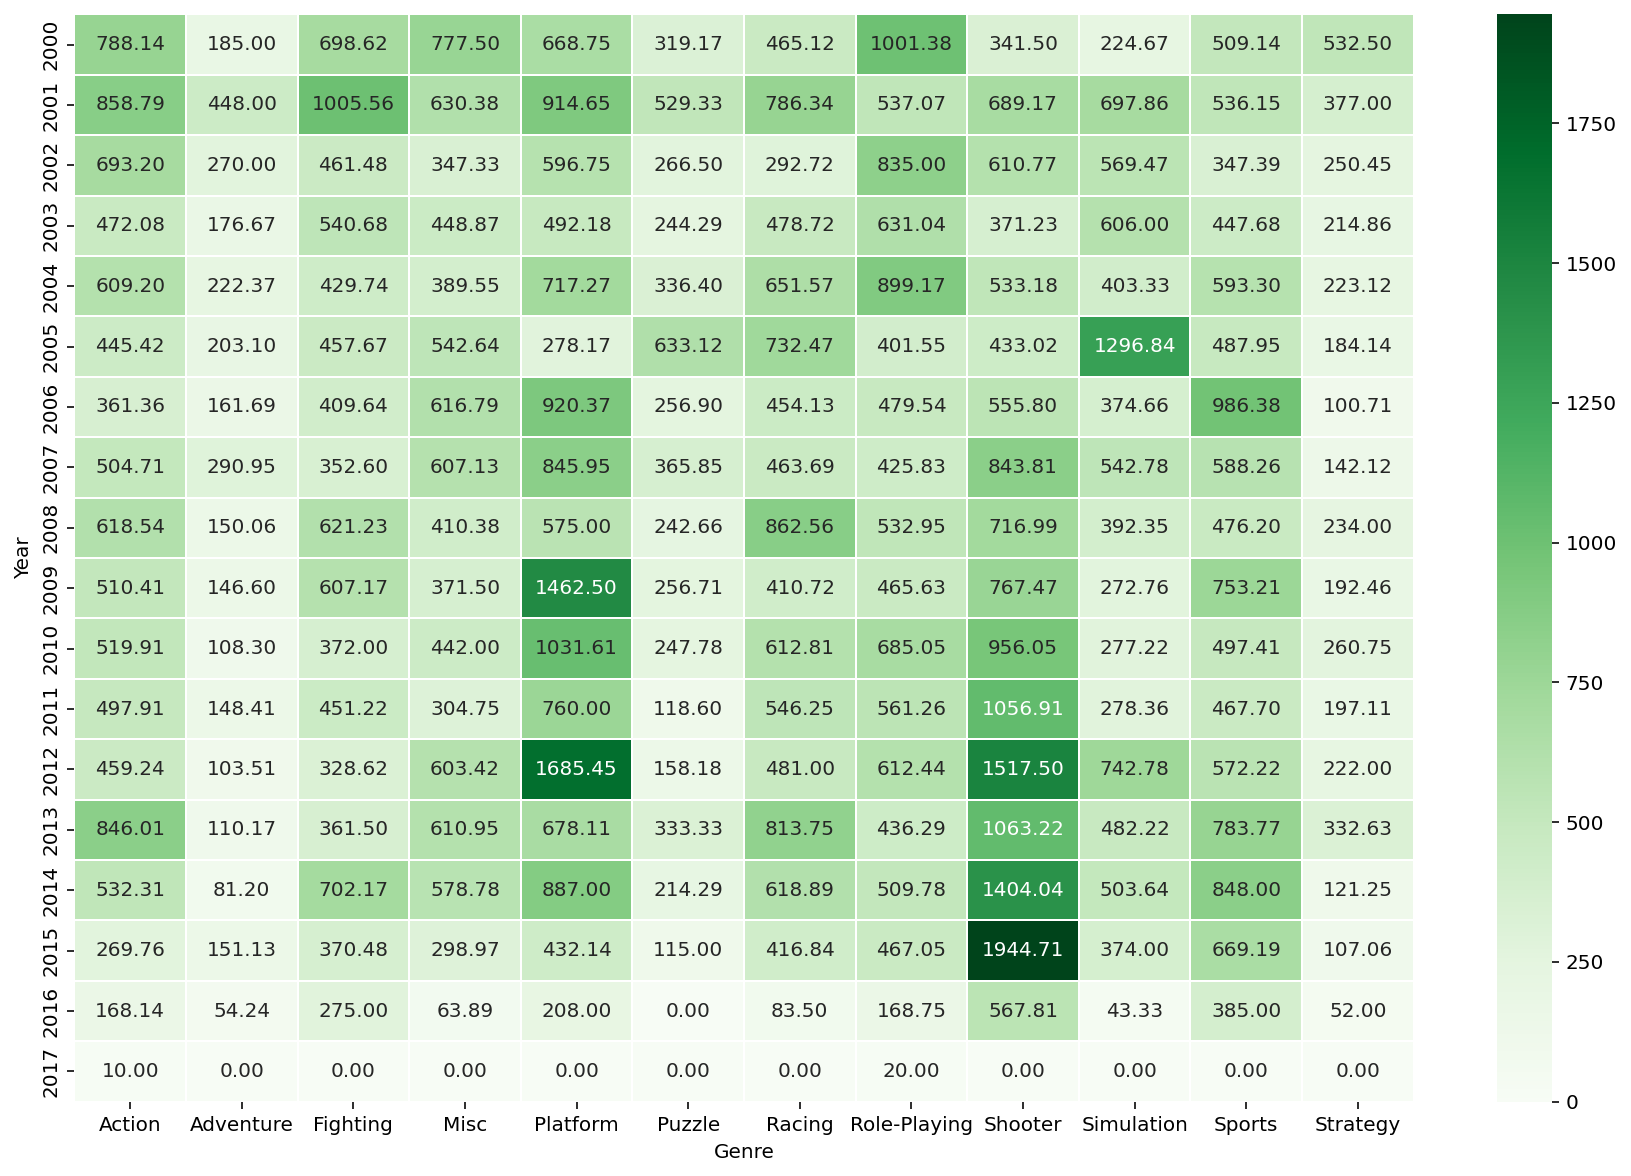

In [100]:
#2000년도 이후 장르별 년도별 평균 판매량
df_heatmap_group2 = df_group.query('Year >= 2000')
genreList = pd.DataFrame(df_heatmap_group2.index.get_level_values(1)).drop_duplicates()
yearList = pd.DataFrame(df_heatmap_group2.index.get_level_values(0)).drop_duplicates()

plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap_group2.pivot_table(index='Year', columns='Genre', values='SalesPerCount'), annot=True, fmt='.2f', linewidths=.5, cmap='Greens')

In [101]:
#2000년도 이후 장르별 평균 판매량 순위
df_gensum = df_heatmap_group2.groupby('Genre').sum()
df_gensum['SalesPerCount'].sort_values(ascending=False)

Genre
Shooter         14373.18
Platform        13153.90
Sports           9948.95
Role-Playing     9669.78
Racing           9171.08
Action           9165.13
Fighting         8445.38
Simulation       8082.27
Misc             8044.83
Puzzle           4638.11
Strategy         3744.16
Adventure        3011.40
Name: SalesPerCount, dtype: float64

In [102]:
# df_dum = df
# df_dum = pd.DataFrame(df.groupby(['Year','Genre'])[('NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales')].sum().sort_values( by=['Year','Genre']))

# df_dum['Count'] = pd.DataFrame(df.groupby(['Year','Genre'])[('Global_Sales')].count())
# df_dum['Per_Sales'] = round(df_dum['Global_Sales'] / df_dum['Count'],2)
# df_dum.drop(['Other_Sales','JP_Sales','EU_Sales','NA_Sales'],axis=1,inplace=True)
# df_dum['Per_Sales'].fillna(0.0, inplace=True)
# df_dum1996 = df_dum.query('Year >= 1996')

# df_dum.unstack().plot(kind='line',figsize=(20,10),y='Per_Sales' ,marker='o')
# plt.title('Game Count')
# plt.xlabel('Year')
# plt.ylabel('Per_Sales')
# plt.show()

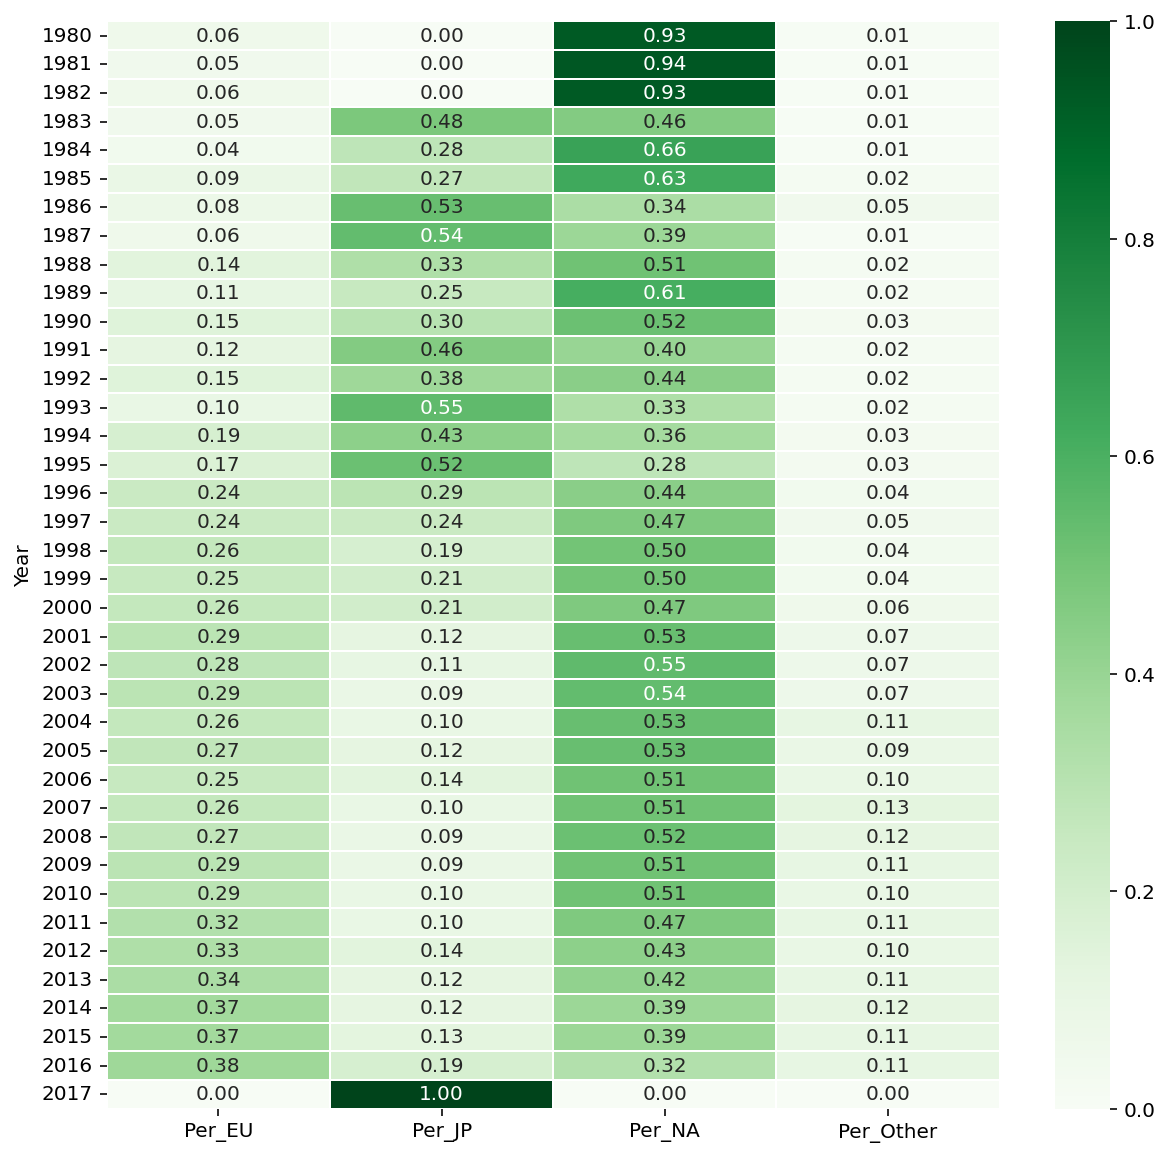

In [103]:
#년도별 지역별 점유율
df_dum = pd.DataFrame(df.groupby(['Year'])[('NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales')].sum().sort_values( by=['Year']))
df_dum['Per_NA'] = round(df_dum['NA_Sales'] / df_dum['Global_Sales'],2)
df_dum['Per_EU'] = round(df_dum['EU_Sales'] / df_dum['Global_Sales'],2)
df_dum['Per_JP'] = round(df_dum['JP_Sales'] / df_dum['Global_Sales'],2)
df_dum['Per_Other'] = round(df_dum['Other_Sales'] / df_dum['Global_Sales'],2)
df_dum.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],axis=1,inplace=True)


plt.figure(figsize=(10, 10))
sns.heatmap(df_dum.pivot_table(index='Year'), annot=True, fmt='.2f', linewidths=.5, cmap='Greens')

In [ ]:
#매년 발매되는 게임 수
df.groupby('Year')['Name'].count()
#매년 매출
df.groupby('Year')['Global_Sales'].mean()

#해당 해에 최대 판매 게임
#최초 플랫폼 발매년도 기준
df_dum = df
df_dum['Global_Sales'] = df_dum['Other_Sales'] +df_dum['JP_Sales'] +df_dum['EU_Sales'] +df_dum['NA_Sales']
df_dum = df_dum.drop(['Platform','Publisher'], axis=1)
df_dum.groupby('Name').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum', 'Year': 'min'})

df_idmax = df_dum.loc[df.groupby('Year')['Global_Sales'].idxmax()]
df_idmax

In [107]:
#2000년이후 판매량 100위
df_pop100 = df.query('Year >= 2000').sort_values(by='Global_Sales', ascending=False).head(100)
df_pop100.groupby('Genre')['Name'].count().sort_values(ascending=False)

Genre
Shooter         26
Action          16
Misc            11
Role-Playing    11
Racing          10
Sports          10
Platform         8
Simulation       4
Fighting         3
Puzzle           1
Adventure        0
Strategy         0
Name: Name, dtype: int64

In [108]:
#전체기간 판매량 100위
df_pop = df.sort_values(by='Global_Sales', ascending=False).head(100)
df_pop.groupby('Genre')['Name'].count().sort_values(ascending=False)

Genre
Shooter         23
Platform        16
Role-Playing    14
Action          13
Racing          10
Misc             8
Sports           6
Simulation       4
Puzzle           3
Fighting         2
Adventure        1
Strategy         0
Name: Name, dtype: int64

In [109]:
#다음분기에는 어떤 게임을 설계해야 하는가?
#슈팅게임 장르. 
#상위100 점유율, 2000년이후 상위100 점유율, 평균 판매량모두 슈터 장르의 게임이 1위였습니다.
#참고로 1980년대 초반 아타리 쇼크가 발생한 이후, 1990년 후반까지 게임 시장의 재편이 이루어졌습니다.
#2000년 이후의 게임들과는 다른 흐름을 가져왔습니다. 그래프 상으로도 2000년 이전과 2000년 이후의 판도가 다른것을 확인할수 있기 때문에
#2000년 이후의 데이터만 따로 보는것 역시 유의미한 차이가 있을것이라 생각합니다.

In [110]:
# 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?
# 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?
# 통계적 기법을 활용한 가설 검정을 진행하였는가?
# 완성도 높은 시각화를 보여주었는가?
# 가독성, 목적성이 잘 드러나는 시각화